# Fresh Products

In [2]:
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns
import sys

# Move two levels up (to the project root) and append the `src` folder
src_path = os.path.abspath(os.path.join(os.getcwd(), '..', '..'))

# Append src to sys.path
sys.path.append(src_path)

from src import query_engines, dataframe_visualizer

q = query_engines.QueryEngines()

# Current Picture

## Q1: Identify all kinds of segmentation

In this first part I want to segment all the possible partners. In Specialties, TP, NTP, MFCs and All groceries

In [3]:
q.prepare_query(
    'possible_segmentations.sql'
    ,params=None
    ,to_load_file='possible_segmentations'
    ,load_from_to_load_file=None
)

possible_segmentations  = q.query_run_starburst()


/Users/jordicremades/Documents/repos/central-node/src/query_engines.py:138: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(self.tp__read_query, conn)


Open the following URL in browser for the external authentication:
https://starburst.g8s-data-platform-prod.glovoint.com/oauth2/token/initiate/c07b724fed35930a60fa5e59349fc09cea14aafcae34394a546d8bde078d3add


KeyError: 'n_store_id'

### Q1.1 How many of them are migrated

In [3]:
q.prepare_query(
    'possible_segmentations_m.sql'
    ,params=None
    ,to_load_file='possible_segmentations_m'
    ,load_from_to_load_file='possible_segmentations_m'
)

possible_segmentations_m  = q.query_run_starburst()
possible_segmentations_m.sort_values(by='n_store_id', ascending=False)

,segment,n_store_id,n_store_id_m,perc_m
3,Specialties,8348,480,0.06
1,Non Top Partner,2723,729,0.27
2,Top Partner,2279,1802,0.79
0,MFC,104,102,0.98


## Q2: Query for current picture questions

In [4]:
START_DATE = "'2024-07-01'"
END_DATE = "'2024-09-30'"

params = [
    {'name':'start_date', 'value':START_DATE},
    {'name':'end_date', 'value':END_DATE}
]

q.prepare_query(
    'current_picture.sql'
    ,params=params
    ,to_load_file='current_picture'
    ,load_from_to_load_file='current_picture'
)

current_picture  = q.query_run_starburst()
current_picture

,country,segment,all_orders,f_orders,all_customers,f_customers,all_products,f_products,fo_all_products,fo_f_products
0,KZ,Non Top Partner,13946,2576,5026,1509,4707,84,18967.0,5168.0
1,MD,Specialties,4866,741,2406,495,1064,169,3018.0,1626.0
2,TN,Top Partner,41797,21073,15703,8838,12764,599,232795.0,80142.0
3,ES,Specialties,23216,12526,8772,4911,7342,421,127887.0,48270.0
4,KG,Top Partner,27615,8143,11270,3923,10143,337,66780.0,21248.0
...,...,...,...,...,...,...,...,...,...,...
63,KE,Top Partner,152072,55399,40832,19220,28979,1233,437758.0,144914.0
64,IT,Specialties,23586,7539,11641,3920,12449,727,79479.0,29022.0
65,MD,Top Partner,15555,7700,5644,3256,4963,155,90496.0,24368.0
66,UG,Non Top Partner,10300,2597,4362,1344,9710,550,19088.0,6340.0


### Q2.1 % of customers that placed a FO in the last 3 months

0.3552920979508231 all MFC
0.2898062112613152 all Non Top Partner
0.5395930862213527 all Top Partner
0.23136296893070157 all Specialties


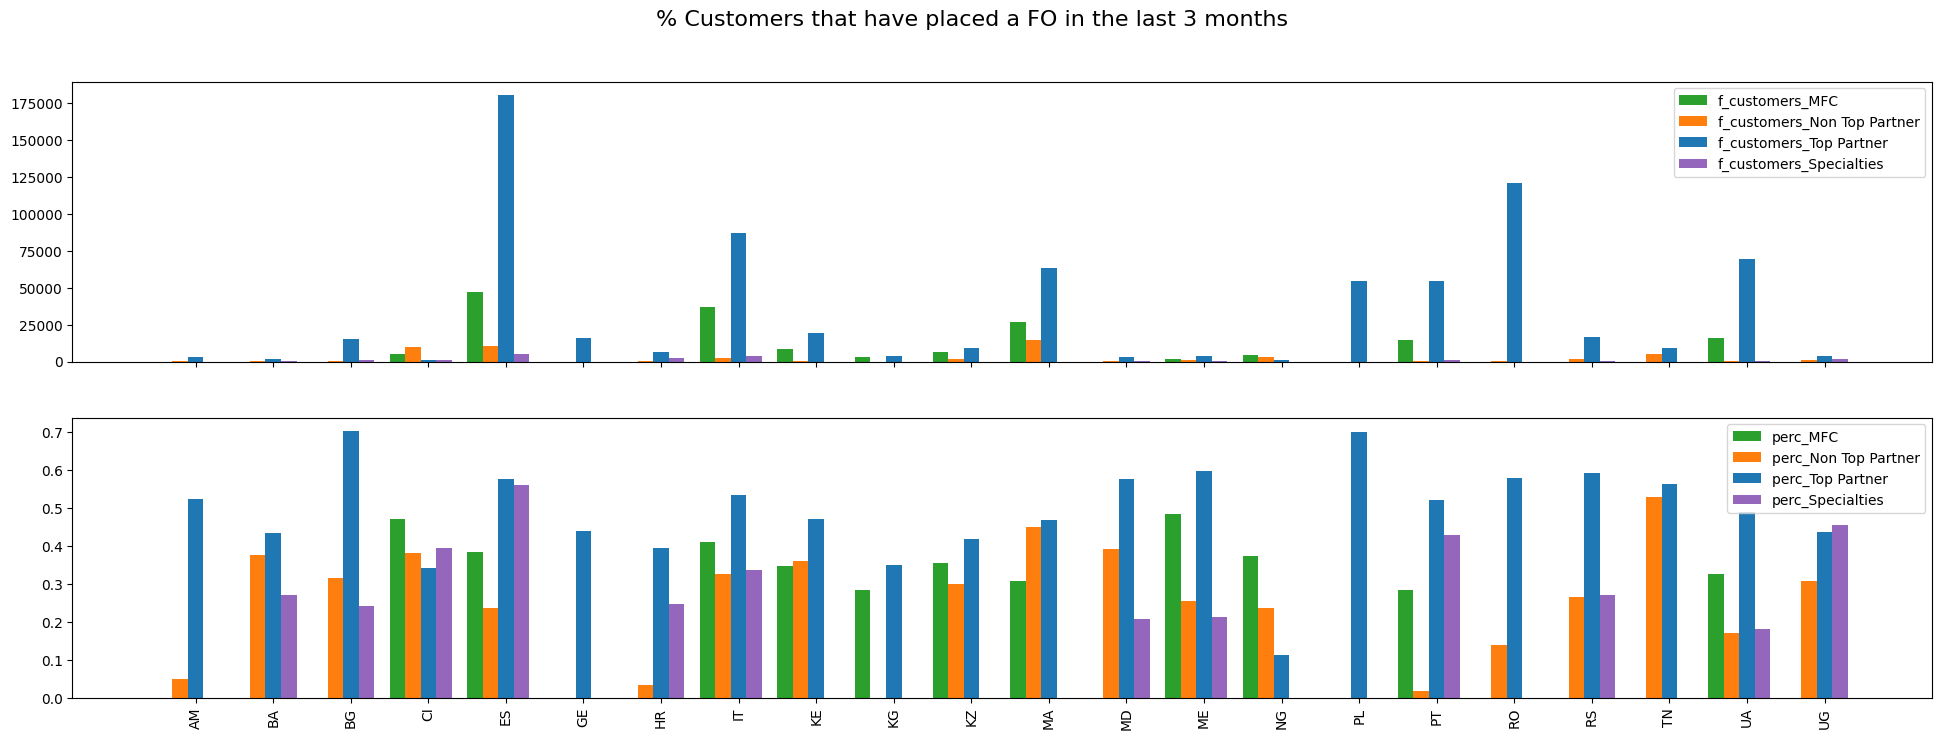

,country,f_customers_MFC,all_customers_MFC,perc_MFC,f_customers_Non Top Partner,all_customers_Non Top Partner,perc_Non Top Partner,f_customers_Top Partner,all_customers_Top Partner,perc_Top Partner,f_customers_Specialties,all_customers_Specialties,perc_Specialties
0,AM,0.0,0.0,NaN,22.0,460.0,0.047826,3255.0,6220.0,0.523312,0.0,0.0,NaN
1,BA,0.0,0.0,NaN,195.0,518.0,0.376448,1861.0,4300.0,0.432791,67.0,247.0,0.271255
2,BG,0.0,0.0,NaN,342.0,1081.0,0.316374,15261.0,21711.0,0.702916,994.0,4123.0,0.241087
3,CI,5268.0,11203.0,0.470231,10080.0,26503.0,0.380334,937.0,2742.0,0.341721,1111.0,2815.0,0.394671
4,ES,46666.0,121704.0,0.383439,10602.0,44964.0,0.235789,180269.0,312585.0,0.576704,4911.0,8772.0,0.559850
5,GE,0.0,0.0,NaN,0.0,442.0,0.000000,15846.0,36194.0,0.437807,0.0,0.0,NaN
6,HR,0.0,0.0,NaN,284.0,8744.0,0.032479,6609.0,16750.0,0.394567,2376.0,9604.0,0.247397
7,IT,37056.0,90550.0,0.409232,2370.0,7296.0,0.324836,86667.0,162478.0,0.533408,3920.0,11641.0,0.336741
8,KE,8307.0,23980.0,0.346414,23.0,64.0,0.359375,19220.0,40832.0,0.470709,0.0,0.0,NaN
9,KG,3207.0,11310.0,0.283554,0.0,0.0,NaN,3923.0,11270.0,0.348092,0.0,0.0,NaN


In [5]:
tmp = current_picture.copy()

pivot_tmp = tmp.pivot(index='country', columns='segment', values=['f_customers','all_customers'])
pivot_tmp.columns = [f'{col[0]}_{col[1]}' for col in pivot_tmp.columns]
pivot_tmp.reset_index(inplace=True)
pivot_tmp.fillna(0, inplace=True)

pivot_tmp['perc_MFC'] = pivot_tmp['f_customers_MFC']/pivot_tmp['all_customers_MFC']
pivot_tmp['perc_Non Top Partner'] = pivot_tmp['f_customers_Non Top Partner']/pivot_tmp['all_customers_Non Top Partner']
pivot_tmp['perc_Top Partner'] = pivot_tmp['f_customers_Top Partner']/pivot_tmp['all_customers_Top Partner']
pivot_tmp['perc_Specialties'] = pivot_tmp['f_customers_Specialties']/pivot_tmp['all_customers_Specialties']

print(pivot_tmp['f_customers_MFC'].sum()/pivot_tmp['all_customers_MFC'].sum(),'all MFC')
print(pivot_tmp['f_customers_Non Top Partner'].sum()/pivot_tmp['all_customers_Non Top Partner'].sum(),'all Non Top Partner')
print(pivot_tmp['f_customers_Top Partner'].sum()/pivot_tmp['all_customers_Top Partner'].sum(),'all Top Partner')
print(pivot_tmp['f_customers_Specialties'].sum()/pivot_tmp['all_customers_Specialties'].sum(),'all Specialties')

v = dataframe_visualizer.DataFrameVisualizer(pivot_tmp)

plot_params = [
    {
        'plot_type': 'barplot',
        'x_column': 'country',
        'y_columns': ['f_customers_MFC','f_customers_Non Top Partner','f_customers_Top Partner','f_customers_Specialties'],
        'legend': True,
        'colors': ['green','orange','blue','purple']
    },
    {
        'plot_type': 'barplot',
        'x_column': 'country',
        'y_columns': ['perc_MFC','perc_Non Top Partner','perc_Top Partner','perc_Specialties'],
        'legend': True,
        'colors': ['green','orange','blue','purple']
    },
]

# Define figure parameters
figure_params = {
    'n_plots': 2,
    'fig_length': 24,  
    'fig_height': 8,   
    'x_rotation': 90,  
    'x_limits': None,  
    'y_limits': None,  
    'share_x': True,   
    'share_y': False,   
    'title': '% Customers that have placed a FO in the last 3 months'
}

# Create the static plot
v.plot(
    figure_params=figure_params,
    plot_params=plot_params
)

pivot_tmp[['country'
           ,'f_customers_MFC'
           ,'all_customers_MFC'
           ,'perc_MFC'
           ,'f_customers_Non Top Partner'
           ,'all_customers_Non Top Partner'
           ,'perc_Non Top Partner'
           ,'f_customers_Top Partner'
           ,'all_customers_Top Partner'
           ,'perc_Top Partner'
           ,'f_customers_Specialties'
           ,'all_customers_Specialties'
           ,'perc_Specialties']]

### Q2.2 % of Fresh Ordres from total ordres

0.26050597569696127 all MFC
0.2544114560455611 all Non Top Partner
0.4477159294453965 all Top Partner
0.20342086046057165 all Specialties


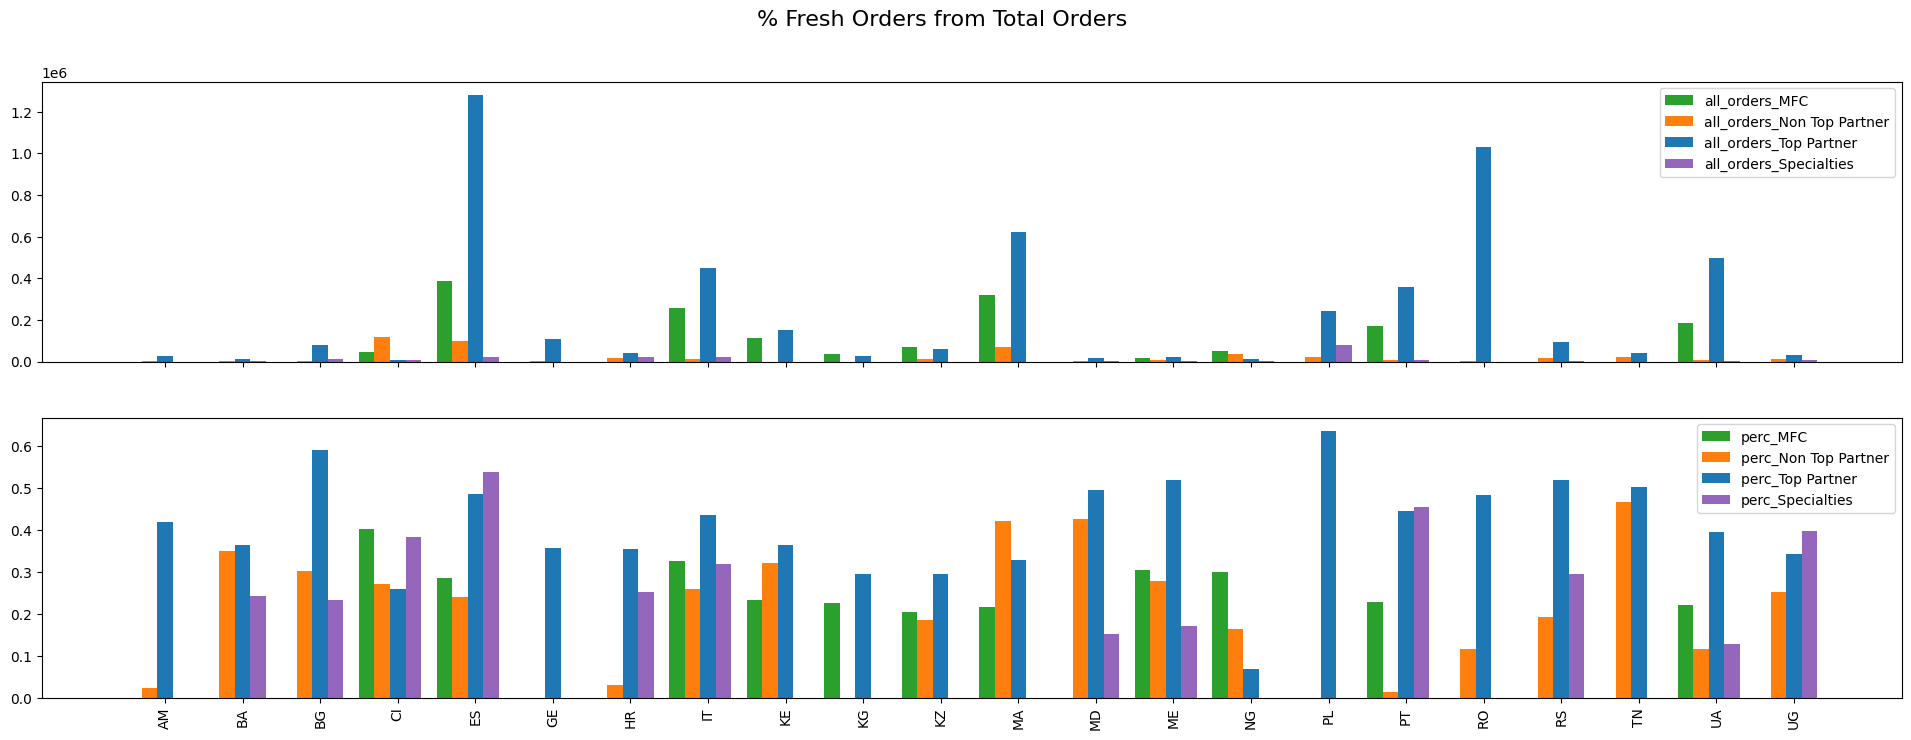

,country,f_orders_MFC,all_orders_MFC,perc_MFC,f_orders_Non Top Partner,all_orders_Non Top Partner,perc_Non Top Partner,f_orders_Top Partner,all_orders_Top Partner,perc_Top Partner,f_orders_Specialties,all_orders_Specialties,perc_Specialties
0,AM,0.0,0.0,NaN,26.0,1150.0,0.022609,11703.0,27830.0,0.420517,0.0,0.0,NaN
1,BA,0.0,0.0,NaN,302.0,862.0,0.350348,4204.0,11545.0,0.364140,131.0,541.0,0.242144
2,BG,0.0,0.0,NaN,714.0,2356.0,0.303056,48004.0,81297.0,0.590477,2273.0,9754.0,0.233033
3,CI,17630.0,43670.0,0.403710,31699.0,116557.0,0.271961,1696.0,6551.0,0.258892,2073.0,5392.0,0.384458
4,ES,110387.0,388004.0,0.284500,23978.0,99651.0,0.240620,622164.0,1280107.0,0.486025,12526.0,23216.0,0.539542
5,GE,0.0,0.0,NaN,0.0,633.0,0.000000,38920.0,108887.0,0.357435,0.0,0.0,NaN
6,HR,0.0,0.0,NaN,459.0,14747.0,0.031125,14513.0,40891.0,0.354919,5642.0,22433.0,0.251504
7,IT,83546.0,255823.0,0.326577,3303.0,12764.0,0.258775,196356.0,450416.0,0.435944,7539.0,23586.0,0.319639
8,KE,25896.0,110805.0,0.233708,27.0,84.0,0.321429,55399.0,152072.0,0.364295,0.0,0.0,NaN
9,KG,8016.0,35618.0,0.225055,0.0,0.0,NaN,8143.0,27615.0,0.294876,0.0,0.0,NaN


In [6]:
tmp = current_picture.copy()

pivot_tmp = tmp.pivot(index='country', columns='segment', values=['f_orders','all_orders'])
pivot_tmp.columns = [f'{col[0]}_{col[1]}' for col in pivot_tmp.columns]
pivot_tmp.reset_index(inplace=True)
pivot_tmp.fillna(0, inplace=True)

pivot_tmp['perc_MFC'] = pivot_tmp['f_orders_MFC']/pivot_tmp['all_orders_MFC']
pivot_tmp['perc_Non Top Partner'] = pivot_tmp['f_orders_Non Top Partner']/pivot_tmp['all_orders_Non Top Partner']
pivot_tmp['perc_Top Partner'] = pivot_tmp['f_orders_Top Partner']/pivot_tmp['all_orders_Top Partner']
pivot_tmp['perc_Specialties'] = pivot_tmp['f_orders_Specialties']/pivot_tmp['all_orders_Specialties']

print(pivot_tmp['f_orders_MFC'].sum()/pivot_tmp['all_orders_MFC'].sum(),'all MFC')
print(pivot_tmp['f_orders_Non Top Partner'].sum()/pivot_tmp['all_orders_Non Top Partner'].sum(),'all Non Top Partner')
print(pivot_tmp['f_orders_Top Partner'].sum()/pivot_tmp['all_orders_Top Partner'].sum(),'all Top Partner')
print(pivot_tmp['f_orders_Specialties'].sum()/pivot_tmp['all_orders_Specialties'].sum(),'all Specialties')

v = dataframe_visualizer.DataFrameVisualizer(pivot_tmp)

plot_params = [
    {
        'plot_type': 'barplot',
        'x_column': 'country',
        'y_columns': ['all_orders_MFC','all_orders_Non Top Partner','all_orders_Top Partner','all_orders_Specialties'],
        'legend': True,
        'colors': ['green','orange','blue','purple']
    },
    {
        'plot_type': 'barplot',
        'x_column': 'country',
        'y_columns': ['perc_MFC','perc_Non Top Partner','perc_Top Partner','perc_Specialties'],
        'legend': True,
        'colors': ['green','orange','blue','purple']
    },
]

# Define figure parameters
figure_params = {
    'n_plots': 2,
    'fig_length': 24,  
    'fig_height': 8,   
    'x_rotation': 90,  
    'x_limits': None,  
    'y_limits': None,  
    'share_x': True,   
    'share_y': False,   
    'title': '% Fresh Orders from Total Orders'
}

# Create the static plot
v.plot(
    figure_params=figure_params,
    plot_params=plot_params
)

pivot_tmp[['country'
           ,'f_orders_MFC'
           ,'all_orders_MFC'
           ,'perc_MFC'
           ,'f_orders_Non Top Partner'
           ,'all_orders_Non Top Partner'
           ,'perc_Non Top Partner'
           ,'f_orders_Top Partner'
           ,'all_orders_Top Partner'
           ,'perc_Top Partner'
           ,'f_orders_Specialties'
           ,'all_orders_Specialties'
           ,'perc_Specialties']]

### Q2.3 In Fresh Ordres what is the % of Fresh Products

0.32049167630725806 all MFC
0.317793097677289 all Non Top Partner
0.25671214650294644 all Top Partner
0.446094014953899 all Specialties


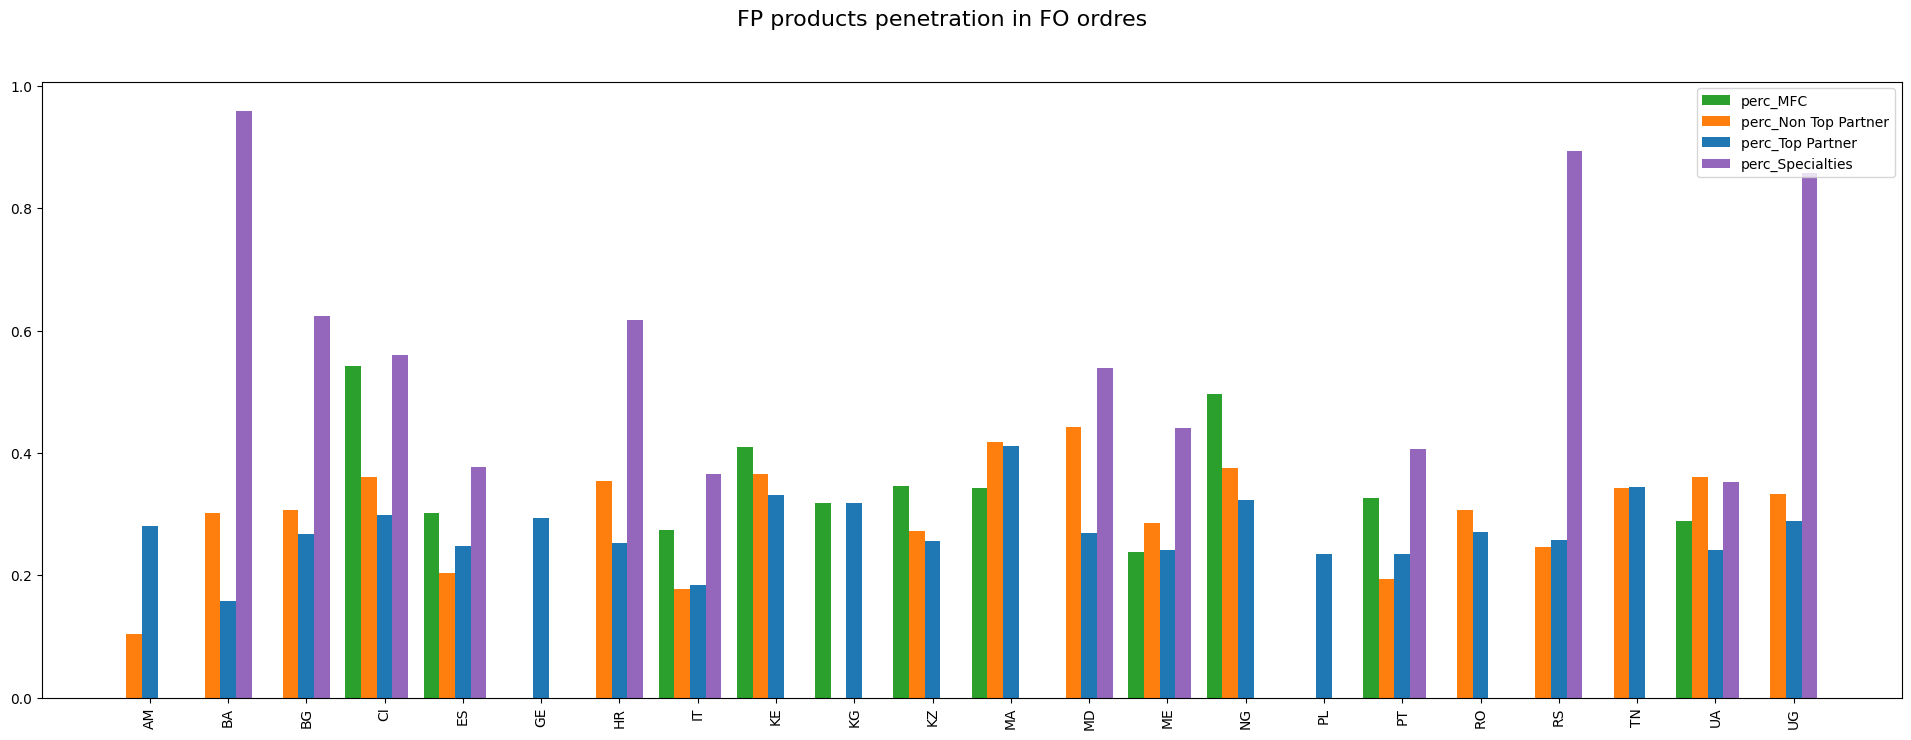

,country,perc_MFC,perc_Non Top Partner,perc_Top Partner,perc_Specialties
0,AM,NaN,0.103943,0.281056,NaN
1,BA,NaN,0.301674,0.157769,0.959563
2,BG,NaN,0.306144,0.267081,0.623283
3,CI,0.541947,0.361286,0.298587,0.559598
4,ES,0.301423,0.203211,0.248201,0.377443
5,GE,NaN,NaN,0.294259,NaN
6,HR,NaN,0.353952,0.253513,0.617464
7,IT,0.274055,0.177706,0.184824,0.365153
8,KE,0.410222,0.365741,0.331037,NaN
9,KG,0.317848,NaN,0.318179,NaN


In [30]:
tmp = current_picture.copy()

pivot_tmp = tmp.pivot(index='country', columns='segment', values=['fo_all_products','fo_f_products'])
pivot_tmp.columns = [f'{col[0]}_{col[1]}' for col in pivot_tmp.columns]
pivot_tmp.reset_index(inplace=True)
pivot_tmp.fillna(0, inplace=True)

pivot_tmp['perc_MFC'] = pivot_tmp['fo_f_products_MFC']/pivot_tmp['fo_all_products_MFC']
pivot_tmp['perc_Non Top Partner'] = pivot_tmp['fo_f_products_Non Top Partner']/pivot_tmp['fo_all_products_Non Top Partner']
pivot_tmp['perc_Top Partner'] = pivot_tmp['fo_f_products_Top Partner']/pivot_tmp['fo_all_products_Top Partner']
pivot_tmp['perc_Specialties'] = pivot_tmp['fo_f_products_Specialties']/pivot_tmp['fo_all_products_Specialties']

print(pivot_tmp['fo_f_products_MFC'].sum()/pivot_tmp['fo_all_products_MFC'].sum(),'all MFC')
print(pivot_tmp['fo_f_products_Non Top Partner'].sum()/pivot_tmp['fo_all_products_Non Top Partner'].sum(),'all Non Top Partner')
print(pivot_tmp['fo_f_products_Top Partner'].sum()/pivot_tmp['fo_all_products_Top Partner'].sum(),'all Top Partner')
print(pivot_tmp['fo_f_products_Specialties'].sum()/pivot_tmp['fo_all_products_Specialties'].sum(),'all Specialties')

v = dataframe_visualizer.DataFrameVisualizer(pivot_tmp)

plot_params = [
    {
        'plot_type': 'barplot',
        'x_column': 'country',
        'y_columns': ['perc_MFC','perc_Non Top Partner','perc_Top Partner','perc_Specialties'],
        'legend': True,
        'colors': ['green','orange','blue','purple']
    },
]

# Define figure parameters
figure_params = {
    'n_plots': 1,
    'fig_length': 24,  
    'fig_height': 8,   
    'x_rotation': 90,  
    'x_limits': None,  
    'y_limits': None,  
    'share_x': True,   
    'share_y': False,   
    'title': 'FP products penetration in FO ordres'
}

# Create the static plot
v.plot(
    figure_params=figure_params,
    plot_params=plot_params
)

pivot_tmp[['country','perc_MFC','perc_Non Top Partner','perc_Top Partner','perc_Specialties']]

## Q3: Fresh Sessions CVR%

0.26377110858100133 all MFC
0.16059337997641915 all Non Top Partner
0.3311251360385572 all Top Partner
0.15225089084480345 all Specialties


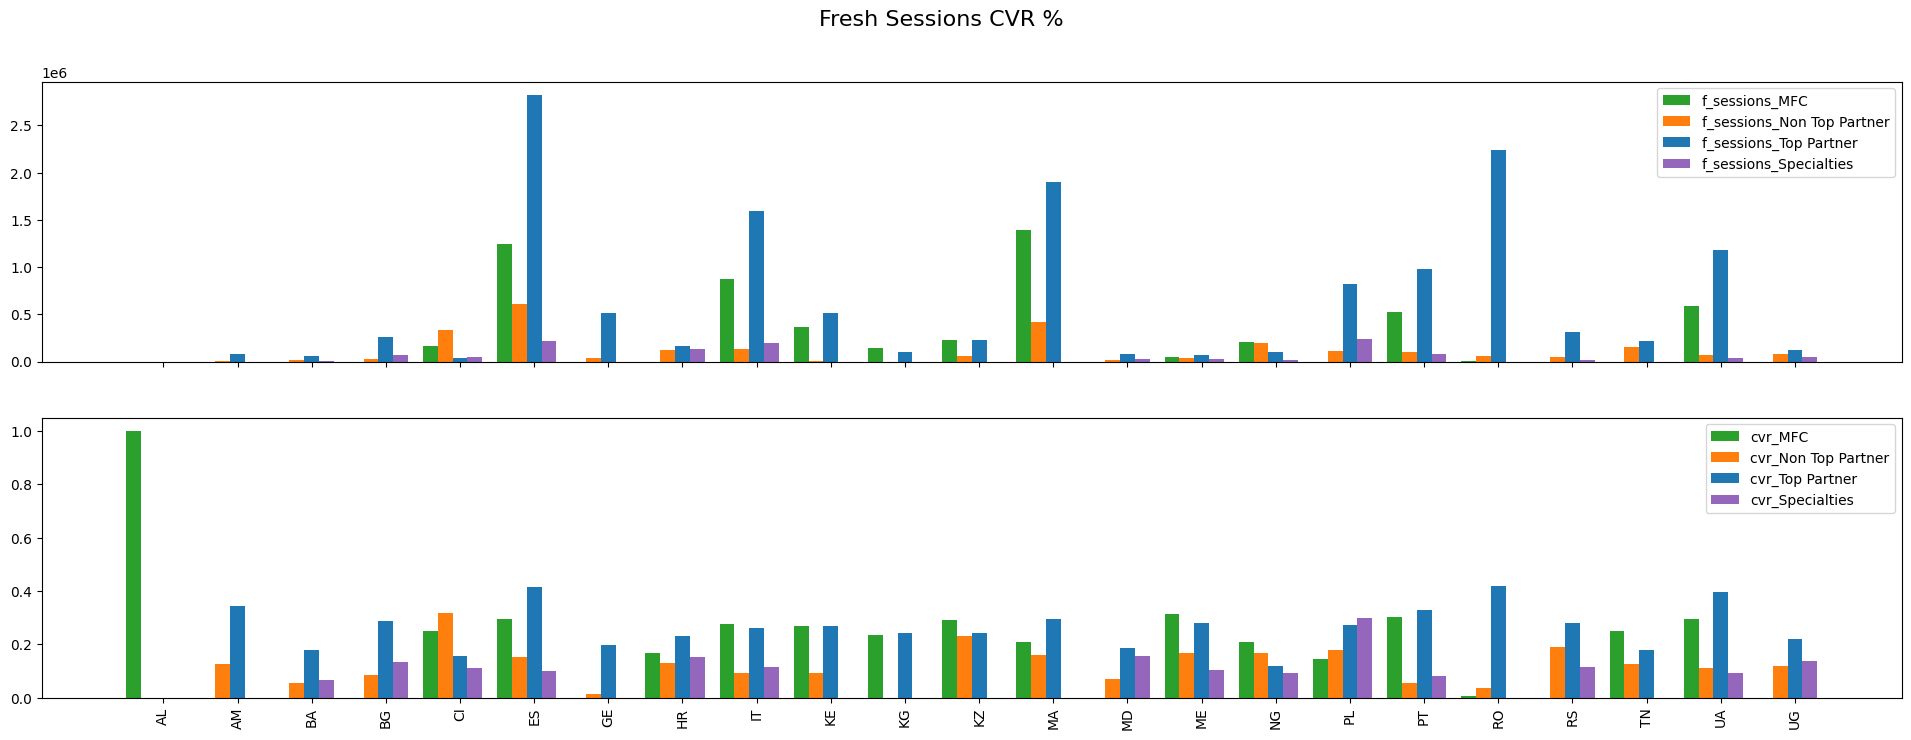

,country,o_sessions_MFC,f_sessions_MFC,cvr_MFC,o_sessions_Non Top Partner,f_sessions_Non Top Partner,cvr_Non Top Partner,o_sessions_Top Partner,f_sessions_Top Partner,cvr_Top Partner,o_sessions_Specialties,f_sessions_Specialties,cvr_Specialties
1,AL,1.0,1.0,1.000000,0.0,0.0,NaN,0.0,1.0,0.000000,0.0,1.0,0.000000
2,AM,0.0,0.0,NaN,1085.0,8588.0,0.126339,25620.0,75037.0,0.341432,0.0,0.0,NaN
3,BA,0.0,2.0,0.000000,744.0,13629.0,0.054589,10655.0,59445.0,0.179241,324.0,5057.0,0.064070
4,BG,0.0,0.0,NaN,2161.0,25549.0,0.084583,74571.0,260653.0,0.286093,9140.0,68852.0,0.132749
5,CI,40837.0,163381.0,0.249950,106000.0,332984.0,0.318334,6171.0,39387.0,0.156676,5029.0,44953.0,0.111872
6,ES,364065.0,1240610.0,0.293456,92080.0,607933.0,0.151464,1172713.0,2822998.0,0.415414,21662.0,220313.0,0.098324
7,GE,0.0,0.0,NaN,595.0,40955.0,0.014528,100668.0,510398.0,0.197234,0.0,0.0,NaN
8,HR,1.0,6.0,0.166667,15468.0,119621.0,0.129308,38320.0,166921.0,0.229570,20434.0,134382.0,0.152059
9,IT,238664.0,868699.0,0.274737,11721.0,128136.0,0.091473,413112.0,1592301.0,0.259443,22144.0,191714.0,0.115505
10,KE,99023.0,366690.0,0.270046,79.0,848.0,0.093160,137181.0,509654.0,0.269165,0.0,0.0,NaN


In [8]:
START_DATE = "'2024-07-01'"
END_DATE = "'2024-09-30'"

params = [
    {'name':'start_date', 'value':START_DATE},
    {'name':'end_date', 'value':END_DATE}
]

q.prepare_query(
    'sessions.sql'
    ,params=params
    ,to_load_file='sessions'
    ,load_from_to_load_file='sessions'
)

sessions  = q.query_run_starburst()

tmp = sessions.copy()
pivot_tmp = tmp.pivot(index='country', columns='segment',values=['f_sessions','o_sessions'])
pivot_tmp.columns = [f'{col[0]}_{col[1]}' for col in pivot_tmp.columns]
pivot_tmp.reset_index(inplace=True)
pivot_tmp.dropna(subset=['country'], inplace=True)
pivot_tmp.fillna(0, inplace=True)

pivot_tmp['cvr_MFC'] = pivot_tmp['o_sessions_MFC']/pivot_tmp['f_sessions_MFC']
pivot_tmp['cvr_Non Top Partner'] = pivot_tmp['o_sessions_Non Top Partner']/pivot_tmp['f_sessions_Non Top Partner']
pivot_tmp['cvr_Top Partner'] = pivot_tmp['o_sessions_Top Partner']/pivot_tmp['f_sessions_Top Partner']
pivot_tmp['cvr_Specialties'] = pivot_tmp['o_sessions_Specialties']/pivot_tmp['f_sessions_Specialties']

print(pivot_tmp['o_sessions_MFC'].sum()/pivot_tmp['f_sessions_MFC'].sum(),'all MFC')
print(pivot_tmp['o_sessions_Non Top Partner'].sum()/pivot_tmp['f_sessions_Non Top Partner'].sum(),'all Non Top Partner')
print(pivot_tmp['o_sessions_Top Partner'].sum()/pivot_tmp['f_sessions_Top Partner'].sum(),'all Top Partner')
print(pivot_tmp['o_sessions_Specialties'].sum()/pivot_tmp['f_sessions_Specialties'].sum(),'all Specialties')

v = dataframe_visualizer.DataFrameVisualizer(pivot_tmp)

plot_params = [
    {
        'plot_type': 'barplot',
        'x_column': 'country',
        'y_columns': ['f_sessions_MFC','f_sessions_Non Top Partner','f_sessions_Top Partner','f_sessions_Specialties'],
        'legend': True,
        'colors': ['green','orange','blue','purple']
    },
    {
        'plot_type': 'barplot',
        'x_column': 'country',
        'y_columns': ['cvr_MFC','cvr_Non Top Partner','cvr_Top Partner','cvr_Specialties'],
        'legend': True,
        'colors': ['green','orange','blue','purple']
    },
]

# Define figure parameters
figure_params = {
    'n_plots': 2,
    'fig_length': 24,  
    'fig_height': 8,   
    'x_rotation': 90,  
    'x_limits': None,  
    'y_limits': None,  
    'share_x': True,   
    'share_y': False,   
    'title': 'Fresh Sessions CVR %'
}

# Create the static plot
v.plot(
    figure_params=figure_params,
    plot_params=plot_params
)

pivot_tmp[['country'
           ,'o_sessions_MFC'
           ,'f_sessions_MFC'
           ,'cvr_MFC'
           ,'o_sessions_Non Top Partner'
           ,'f_sessions_Non Top Partner'
           ,'cvr_Non Top Partner'
           ,'o_sessions_Top Partner'
           ,'f_sessions_Top Partner'
           ,'cvr_Top Partner'
           ,'o_sessions_Specialties'
           ,'f_sessions_Specialties'
           ,'cvr_Specialties']]

# Value of nudging users to Fresh

## Q4: Query for nuding users to Fresh questions

In [15]:
START_DATE = "'2024-07-01'"
END_DATE = "'2024-08-31'"

params = [
    {'name':'start_date', 'value':START_DATE},
    {'name':'end_date', 'value':END_DATE}
]

q.prepare_query(
    'nudging.sql'
    ,params=params
    ,to_load_file='nudging'
    ,load_from_to_load_file='nudging'
)

nudging  = q.query_run_starburst()
print('Data Considerations:')
print('1st July to 31st August')
print('only delivered orders')
print('only parent orders')
nudging

Data Considerations:
1st July to 31st August
only delivered orders
only parent orders


,country,segment,f_orders,nf_orders,f_value,nf_value,f_orders_ret,nf_orders_ret,f_orders_pna,nf_orders_pna,f_products,nf_products
0,ES,Top Partner,390783,414407,1.365439e+07,9.868862e+06,327785,324489,192623,126914,5432248,3166518
1,NG,MFC,9628,22780,6.226931e+04,1.044350e+05,8491,18242,503,736,47587,69415
2,KG,Top Partner,5126,11886,6.140321e+04,9.677291e+04,3727,7811,280,329,40501,45414
3,ES,Specialties,7267,5973,3.106255e+05,1.733494e+05,6521,4992,3626,1819,73778,30982
4,PT,Specialties,1960,2300,6.746234e+04,5.164637e+04,1771,1823,1059,556,19363,10156
...,...,...,...,...,...,...,...,...,...,...,...,...
63,PT,Non Top Partner,53,3641,1.013960e+03,4.382986e+04,39,2288,30,636,479,17485
64,BG,Top Partner,29778,20474,9.085757e+05,4.483035e+05,22863,15211,11999,5160,372926,142482
65,UA,Non Top Partner,550,4575,1.825037e+04,1.117330e+05,458,3708,25,41,3034,10579
66,AM,Top Partner,7563,9717,2.092273e+05,1.756128e+05,6404,7619,2948,1639,103438,70316


### Q4.1 Retention 1st degree

In [22]:
tmp = nudging.copy()
pivot_tmp = tmp.pivot(index='country',columns='segment',values=['f_orders','nf_orders','f_orders_ret','nf_orders_ret'])
pivot_tmp.columns = [f'{col[0]}_{col[1]}' for col in pivot_tmp.columns]
pivot_tmp.reset_index(inplace=True)
pivot_tmp.fillna(0, inplace=True)

pivot_tmp['f_perc_MFC'] = pivot_tmp['f_orders_ret_MFC']/pivot_tmp['f_orders_MFC']
pivot_tmp['nf_perc_MFC'] = pivot_tmp['nf_orders_ret_MFC']/pivot_tmp['nf_orders_MFC']
pivot_tmp['f_perc_Non Top Partner'] = pivot_tmp['f_orders_ret_Non Top Partner']/pivot_tmp['f_orders_Non Top Partner']
pivot_tmp['nf_perc_Non Top Partner'] = pivot_tmp['nf_orders_ret_Non Top Partner']/pivot_tmp['nf_orders_Non Top Partner']
pivot_tmp['f_perc_Top Partner'] = pivot_tmp['f_orders_ret_Top Partner']/pivot_tmp['f_orders_Top Partner']
pivot_tmp['nf_perc_Top Partner'] = pivot_tmp['nf_orders_ret_Top Partner']/pivot_tmp['nf_orders_Top Partner']
pivot_tmp['f_perc_Specialties'] = pivot_tmp['f_orders_ret_Specialties']/pivot_tmp['f_orders_Specialties']
pivot_tmp['nf_perc_Specialties'] = pivot_tmp['nf_orders_ret_Specialties']/pivot_tmp['nf_orders_Specialties']

print(pivot_tmp['f_orders_ret_MFC'].sum()/pivot_tmp['f_orders_MFC'].sum(),'all f MFC')
print(pivot_tmp['nf_orders_ret_MFC'].sum()/pivot_tmp['nf_orders_MFC'].sum(),'all nf MFC')
print(pivot_tmp['f_orders_ret_Non Top Partner'].sum()/pivot_tmp['f_orders_Non Top Partner'].sum(),'all f Non Top Partner')
print(pivot_tmp['nf_orders_ret_Non Top Partner'].sum()/pivot_tmp['nf_orders_Non Top Partner'].sum(),'all nf Non Top Partner')
print(pivot_tmp['f_orders_ret_Top Partner'].sum()/pivot_tmp['f_orders_Top Partner'].sum(),'all f Top Partner')
print(pivot_tmp['nf_orders_ret_Top Partner'].sum()/pivot_tmp['nf_orders_Top Partner'].sum(),'all nf Top Partner')
print(pivot_tmp['f_orders_ret_Specialties'].sum()/pivot_tmp['f_orders_Specialties'].sum(),'all f Specialties')
print(pivot_tmp['nf_orders_ret_Specialties'].sum()/pivot_tmp['nf_orders_Specialties'].sum(),'all nf Specialties')

pivot_tmp[['country','f_perc_MFC', 'nf_perc_MFC', 'f_perc_Non Top Partner', 'nf_perc_Non Top Partner', 'f_perc_Top Partner', 'nf_perc_Top Partner', 'f_perc_Specialties', 'nf_perc_Specialties']]

0.8296893536786282 all f MFC
0.7744214096659233 all nf MFC
0.8324193087689231 all f Non Top Partner
0.742440288799586 all nf Non Top Partner
0.8176324061893603 all f Top Partner
0.7662757951926462 all nf Top Partner
0.8230634927394285 all f Specialties
0.7603408338848445 all nf Specialties


,country,f_perc_MFC,nf_perc_MFC,f_perc_Non Top Partner,nf_perc_Non Top Partner,f_perc_Top Partner,nf_perc_Top Partner,f_perc_Specialties,nf_perc_Specialties
0,AM,NaN,NaN,0.823529,0.829726,0.846754,0.784090,NaN,NaN
1,BA,NaN,NaN,0.652695,0.582456,0.665946,0.591718,0.692308,0.379518
2,BG,NaN,NaN,0.803456,0.714573,0.767782,0.742942,0.839262,0.723281
3,CI,0.889485,0.822878,0.876521,0.800019,0.847170,0.805769,0.855243,0.793233
4,ES,0.807753,0.750769,0.856781,0.724880,0.838790,0.783020,0.897344,0.835761
5,GE,NaN,NaN,NaN,0.680115,0.851914,0.783513,NaN,NaN
6,HR,NaN,NaN,0.684713,0.526879,0.698681,0.613581,0.740434,0.622670
7,IT,0.732795,0.680442,0.696653,0.669251,0.691496,0.649395,0.768939,0.659839
8,KE,0.911838,0.854321,1.000000,0.416667,0.837179,0.780721,NaN,NaN
9,KG,0.823688,0.733536,NaN,NaN,0.727078,0.657160,NaN,NaN


### Q4.2 PNA

In [23]:
tmp = nudging.copy()
pivot_tmp = tmp.pivot(index='country',columns='segment',values=['f_orders_pna','nf_orders_pna','f_orders','nf_orders'])
pivot_tmp.columns = [f'{col[0]}_{col[1]}' for col in pivot_tmp.columns]
pivot_tmp.reset_index(inplace=True)
pivot_tmp.fillna(0, inplace=True)

pivot_tmp['f_perc_MFC_pna'] = pivot_tmp['f_orders_pna_MFC']/pivot_tmp['f_orders_MFC']
pivot_tmp['nf_perc_MFC_pna'] = pivot_tmp['nf_orders_pna_MFC']/pivot_tmp['nf_orders_MFC']
pivot_tmp['f_perc_Non Top Partner_pna'] = pivot_tmp['f_orders_pna_Non Top Partner']/pivot_tmp['f_orders_Non Top Partner']
pivot_tmp['nf_perc_Non Top Partner_pna'] = pivot_tmp['nf_orders_pna_Non Top Partner']/pivot_tmp['nf_orders_Non Top Partner']
pivot_tmp['f_perc_Top Partner_pna'] = pivot_tmp['f_orders_pna_Top Partner']/pivot_tmp['f_orders_Top Partner']
pivot_tmp['nf_perc_Top Partner_pna'] = pivot_tmp['nf_orders_pna_Top Partner']/pivot_tmp['nf_orders_Top Partner']
pivot_tmp['f_perc_Specialties_pna'] = pivot_tmp['f_orders_pna_Specialties']/pivot_tmp['f_orders_Specialties']
pivot_tmp['nf_perc_Specialties_pna'] = pivot_tmp['nf_orders_pna_Specialties']/pivot_tmp['nf_orders_Specialties']

print(pivot_tmp['f_orders_pna_MFC'].sum()/pivot_tmp['f_orders_MFC'].sum(),'all f MFC')
print(pivot_tmp['nf_orders_pna_MFC'].sum()/pivot_tmp['nf_orders_MFC'].sum(),'all nf MFC')
print(pivot_tmp['f_orders_pna_Non Top Partner'].sum()/pivot_tmp['f_orders_Non Top Partner'].sum(),'all f Non Top Partner')
print(pivot_tmp['nf_orders_pna_Non Top Partner'].sum()/pivot_tmp['nf_orders_Non Top Partner'].sum(),'all nf Non Top Partner')
print(pivot_tmp['f_orders_pna_Top Partner'].sum()/pivot_tmp['f_orders_Top Partner'].sum(),'all f Top Partner')
print(pivot_tmp['nf_orders_pna_Top Partner'].sum()/pivot_tmp['nf_orders_Top Partner'].sum(),'all nf Top Partner')
print(pivot_tmp['f_orders_pna_Specialties'].sum()/pivot_tmp['f_orders_Specialties'].sum(),'all f Specialties')
print(pivot_tmp['nf_orders_pna_Specialties'].sum()/pivot_tmp['nf_orders_Specialties'].sum(),'all nf Specialties')

pivot_tmp[['country','f_perc_MFC_pna', 'nf_perc_MFC_pna', 'f_perc_Non Top Partner_pna', 'nf_perc_Non Top Partner_pna', 'f_perc_Top Partner_pna', 'nf_perc_Top Partner_pna', 'f_perc_Specialties_pna', 'nf_perc_Specialties_pna']]

0.0584735078526243 all f MFC
0.025103943063168207 all nf MFC
0.38756069694373035 all f Non Top Partner
0.19463022336994104 all nf Non Top Partner
0.4135414848697857 all f Top Partner
0.23979981535723063 all nf Top Partner
0.3453562151343525 all f Specialties
0.11017124420913302 all nf Specialties


,country,f_perc_MFC_pna,nf_perc_MFC_pna,f_perc_Non Top Partner_pna,nf_perc_Non Top Partner_pna,f_perc_Top Partner_pna,nf_perc_Top Partner_pna,f_perc_Specialties_pna,nf_perc_Specialties_pna
0,AM,NaN,NaN,0.470588,0.240981,0.389792,0.168673,NaN,NaN
1,BA,NaN,NaN,0.125749,0.070175,0.291892,0.172050,0.000000,0.078313
2,BG,NaN,NaN,0.237581,0.104523,0.402948,0.252027,0.192358,0.153687
3,CI,0.072622,0.030682,0.236607,0.145710,0.146226,0.096795,0.163537,0.109962
4,ES,0.047232,0.019310,0.495972,0.239752,0.492916,0.306254,0.498968,0.304537
5,GE,NaN,NaN,NaN,0.031700,0.433074,0.251654,NaN,NaN
6,HR,NaN,NaN,0.092357,0.098208,0.332934,0.211092,0.111936,0.072571
7,IT,0.054411,0.031243,0.648013,0.418974,0.623787,0.400724,0.496313,0.174906
8,KE,0.060736,0.015557,0.000000,0.250000,0.143059,0.118403,NaN,NaN
9,KG,0.082997,0.039681,NaN,NaN,0.054623,0.027680,NaN,NaN


### Q4.3 AOV

In [24]:
tmp = nudging.copy()
pivot_tmp = tmp.pivot(index='country',columns='segment',values=['f_value','nf_value','f_orders','nf_orders'])
pivot_tmp.columns = [f'{col[0]}_{col[1]}' for col in pivot_tmp.columns]
pivot_tmp.reset_index(inplace=True)
pivot_tmp.fillna(0, inplace=True)

pivot_tmp['f_aov_MFC'] = pivot_tmp['f_value_MFC']/pivot_tmp['f_orders_MFC']
pivot_tmp['nf_aov_MFC'] = pivot_tmp['nf_value_MFC']/pivot_tmp['nf_orders_MFC']
pivot_tmp['f_aov_Non Top Partner'] = pivot_tmp['f_value_Non Top Partner']/pivot_tmp['f_orders_Non Top Partner']
pivot_tmp['nf_aov_Non Top Partner'] = pivot_tmp['nf_value_Non Top Partner']/pivot_tmp['nf_orders_Non Top Partner']
pivot_tmp['f_aov_Top Partner'] = pivot_tmp['f_value_Top Partner']/pivot_tmp['f_orders_Top Partner']
pivot_tmp['nf_aov_Top Partner'] = pivot_tmp['nf_value_Top Partner']/pivot_tmp['nf_orders_Top Partner']
pivot_tmp['f_aov_Specialties'] = pivot_tmp['f_value_Specialties']/pivot_tmp['f_orders_Specialties']
pivot_tmp['nf_aov_Specialties'] = pivot_tmp['nf_value_Specialties']/pivot_tmp['nf_orders_Specialties']

print(pivot_tmp['f_value_MFC'].sum()/pivot_tmp['f_orders_MFC'].sum(),'all f MFC')
print(pivot_tmp['nf_value_MFC'].sum()/pivot_tmp['nf_orders_MFC'].sum(),'all nf MFC')
print(pivot_tmp['f_value_Non Top Partner'].sum()/pivot_tmp['f_orders_Non Top Partner'].sum(),'all f Non Top Partner')
print(pivot_tmp['nf_value_Non Top Partner'].sum()/pivot_tmp['nf_orders_Non Top Partner'].sum(),'all nf Non Top Partner')
print(pivot_tmp['f_value_Top Partner'].sum()/pivot_tmp['f_orders_Top Partner'].sum(),'all f Top Partner')
print(pivot_tmp['nf_value_Top Partner'].sum()/pivot_tmp['nf_orders_Top Partner'].sum(),'all nf Top Partner')
print(pivot_tmp['f_value_Specialties'].sum()/pivot_tmp['f_orders_Specialties'].sum(),'all f Specialties')
print(pivot_tmp['nf_value_Specialties'].sum()/pivot_tmp['nf_orders_Specialties'].sum(),'all nf Specialties')

pivot_tmp[['country','f_aov_MFC', 'nf_aov_MFC', 'f_aov_Non Top Partner', 'nf_aov_Non Top Partner', 'f_aov_Top Partner', 'nf_aov_Top Partner', 'f_aov_Specialties', 'nf_aov_Specialties']]

24.229224042911643 all f MFC
15.581212791979443 all nf MFC
23.237638432531718 all f Non Top Partner
14.57841811479883 all nf Non Top Partner
29.426817460758485 all f Top Partner
19.034001068847676 all nf Top Partner
32.86164055688654 all f Specialties
19.121065462433716 all nf Specialties


,country,f_aov_MFC,nf_aov_MFC,f_aov_Non Top Partner,nf_aov_Non Top Partner,f_aov_Top Partner,nf_aov_Top Partner,f_aov_Specialties,nf_aov_Specialties
0,AM,NaN,NaN,18.315184,14.997517,27.664594,18.072744,NaN,NaN
1,BA,NaN,NaN,23.632346,12.565645,27.191216,16.385100,19.272317,11.084614
2,BG,NaN,NaN,22.026659,17.050452,30.511642,21.896234,27.872946,21.534985
3,CI,12.594565,9.725850,19.791684,13.219637,23.184572,14.106008,19.362873,18.834588
4,ES,31.786228,22.010283,35.741485,20.412222,34.941117,23.814420,42.744665,29.022161
5,GE,NaN,NaN,NaN,13.474396,21.250970,14.327067,NaN,NaN
6,HR,NaN,NaN,17.952771,12.496155,24.702101,16.225460,22.852847,18.159476
7,IT,33.903534,21.267659,34.650282,23.201932,35.274653,22.927988,42.694163,30.023006
8,KE,12.132197,9.691814,9.258275,7.425025,17.346507,12.569704,NaN,NaN
9,KG,17.038845,11.201561,NaN,NaN,11.978778,8.141756,NaN,NaN


### Q4.4 UIPO

In [33]:
tmp = nudging.copy()
pivot_tmp = tmp.pivot(index='country',columns='segment',values=['f_products','nf_products','f_orders','nf_orders'])
pivot_tmp.columns = [f'{col[0]}_{col[1]}' for col in pivot_tmp.columns]
pivot_tmp.reset_index(inplace=True)
pivot_tmp.fillna(0, inplace=True)

pivot_tmp['f_uipo_MFC'] = pivot_tmp['f_products_MFC']/pivot_tmp['f_orders_MFC']
pivot_tmp['nf_uipo_MFC'] = pivot_tmp['nf_products_MFC']/pivot_tmp['nf_orders_MFC']
pivot_tmp['f_uipo_Non Top Partner'] = pivot_tmp['f_products_Non Top Partner']/pivot_tmp['f_orders_Non Top Partner']
pivot_tmp['nf_uipo_Non Top Partner'] = pivot_tmp['nf_products_Non Top Partner']/pivot_tmp['nf_orders_Non Top Partner']
pivot_tmp['f_uipo_Top Partner'] = pivot_tmp['f_products_Top Partner']/pivot_tmp['f_orders_Top Partner']
pivot_tmp['nf_uipo_Top Partner'] = pivot_tmp['nf_products_Top Partner']/pivot_tmp['nf_orders_Top Partner']
pivot_tmp['f_uipo_Specialties'] = pivot_tmp['f_products_Specialties']/pivot_tmp['f_orders_Specialties']
pivot_tmp['nf_uipo_Specialties'] = pivot_tmp['nf_products_Specialties']/pivot_tmp['nf_orders_Specialties']

print(pivot_tmp['f_products_MFC'].sum()/pivot_tmp['f_orders_MFC'].sum(),'all f MFC')
print(pivot_tmp['nf_products_MFC'].sum()/pivot_tmp['nf_orders_MFC'].sum(),'all nf MFC')
print(pivot_tmp['f_products_Non Top Partner'].sum()/pivot_tmp['f_orders_Non Top Partner'].sum(),'all f Non Top Partner')
print(pivot_tmp['nf_products_Non Top Partner'].sum()/pivot_tmp['nf_orders_Non Top Partner'].sum(),'all nf Non Top Partner')
print(pivot_tmp['f_products_Top Partner'].sum()/pivot_tmp['f_orders_Top Partner'].sum(),'all f Top Partner')
print(pivot_tmp['nf_products_Top Partner'].sum()/pivot_tmp['nf_orders_Top Partner'].sum(),'all nf Top Partner')
print(pivot_tmp['f_products_Specialties'].sum()/pivot_tmp['f_orders_Specialties'].sum(),'all f Specialties')
print(pivot_tmp['nf_products_Specialties'].sum()/pivot_tmp['nf_orders_Specialties'].sum(),'all nf Specialties')

pivot_tmp[['country','f_uipo_MFC', 'nf_uipo_MFC', 'f_uipo_Non Top Partner', 'nf_uipo_Non Top Partner', 'f_uipo_Top Partner', 'nf_uipo_Top Partner', 'f_uipo_Specialties', 'nf_uipo_Specialties']]

7.542149049243002 all f MFC
3.714432715753496 all nf MFC
9.768694658668952 all f Non Top Partner
4.503755071643769 all nf Non Top Partner
13.26155848760631 all f Top Partner
6.664161591204451 all nf Top Partner
7.772601456372695 all f Specialties
3.806264477167439 all nf Specialties


,country,f_uipo_MFC,nf_uipo_MFC,f_uipo_Non Top Partner,nf_uipo_Non Top Partner,f_uipo_Top Partner,nf_uipo_Top Partner,f_uipo_Specialties,nf_uipo_Specialties
0,AM,NaN,NaN,9.470588,6.825397,13.676848,7.236390,NaN,NaN
1,BA,NaN,NaN,10.922156,3.807018,13.012973,6.713458,7.230769,2.162651
2,BG,NaN,NaN,9.049676,5.299497,12.523541,6.959168,7.208169,4.239229
3,CI,5.919114,2.581710,6.711745,3.551086,6.993396,3.731731,3.597027,1.811090
4,ES,7.827102,3.875508,13.231906,5.687694,13.900932,7.641082,10.152470,5.187008
5,GE,NaN,NaN,NaN,3.368876,9.940147,5.054587,NaN,NaN
6,HR,NaN,NaN,5.378981,3.246609,9.606563,4.916385,4.213307,2.565806
7,IT,8.451123,4.024475,12.848849,6.745293,16.674979,8.406395,10.167374,3.862520
8,KE,5.875062,2.346832,3.500000,3.166667,7.697308,4.282521,NaN,NaN
9,KG,7.420592,3.646677,NaN,NaN,7.901092,3.820798,NaN,NaN


In [40]:
pivot_tmp.describe()

,f_products_MFC,f_products_Non Top Partner,f_products_Specialties,f_products_Top Partner,nf_products_MFC,nf_products_Non Top Partner,nf_products_Specialties,nf_products_Top Partner,f_orders_MFC,f_orders_Non Top Partner,...,nf_orders_Specialties,nf_orders_Top Partner,f_uipo_MFC,nf_uipo_MFC,f_uipo_Non Top Partner,nf_uipo_Non Top Partner,f_uipo_Top Partner,nf_uipo_Top Partner,f_uipo_Specialties,nf_uipo_Specialties
count,22.000000,22.000000,22.000000,2.200000e+01,22.000000,22.000000,22.000000,2.200000e+01,22.000000,22.000000,...,22.000000,22.000000,11.000000,11.000000,19.000000,21.000000,22.000000,22.000000,12.000000,14.000000
mean,92182.545455,31091.090909,8296.545455,8.738457e+05,129621.545455,42332.636364,16730.954545,5.472888e+05,12222.318182,3182.727273,...,4395.636364,82124.181818,7.210377,3.608777,8.785046,4.442438,11.322817,6.004257,6.102493,2.996135
std,155413.760993,59331.452781,17977.630547,1.416824e+06,212262.792609,67515.711754,45223.639942,8.183549e+05,19465.763524,5842.897391,...,10517.653099,118536.314525,1.450249,0.799227,2.930602,1.229739,3.138343,1.567639,2.802360,1.257390
min,0.000000,0.000000,0.000000,1.655000e+03,0.000000,0.000000,0.000000,1.164300e+04,0.000000,0.000000,...,0.000000,3120.000000,4.942563,2.346832,3.500000,2.312350,6.107011,3.689473,2.423077,1.607108
25%,0.000000,781.500000,0.000000,6.531050e+04,0.000000,4814.250000,0.000000,5.032000e+04,0.000000,74.750000,...,0.000000,10259.250000,6.020500,3.078957,6.295850,3.538033,9.230781,4.950935,4.013840,1.865824
50%,15166.000000,3612.000000,408.000000,1.881010e+05,17011.500000,16437.000000,3077.500000,1.418380e+05,1524.500000,506.500000,...,1462.500000,23306.500000,7.420592,3.727144,9.049676,4.109105,11.659004,5.752662,5.518847,2.427652
75%,88001.500000,20245.000000,5882.500000,1.199069e+06,142382.000000,37047.000000,9240.750000,8.719192e+05,14957.500000,1896.000000,...,3012.000000,112515.500000,8.062002,3.977844,10.869283,5.221383,12.917105,6.923192,7.892847,4.173758
max,556640.000000,198730.000000,73778.000000,5.432248e+06,690600.000000,269045.000000,213180.000000,3.166518e+06,71117.000000,19226.000000,...,49531.000000,414407.000000,9.948180,5.161256,13.231906,6.825397,18.886130,9.733773,10.167374,5.187008
